In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv("../Data/Normalized_Input_FeatureSet_Mar03_2021.csv")
data.shape

(3226659, 17)

In [39]:
data.columns

Index(['Unnamed: 0', 'dist', 'abs_ngl', 'rel_ngl', 'speed', 'height',
       'dist_bus', 'dist_sub', 'dist_green', 'dist_shore', 'dist_res',
       'dist_comm', 'dist_bike', 'timeOfDay', 'season', 'city', 'mode'],
      dtype='object')

In [5]:
data[['season']].value_counts()

season
Fall      3226645
Winter         14
dtype: int64

In [7]:
data[['city']].value_counts()

city     
Montreal     3226147
St. Johns        336
Vancouver        176
dtype: int64

In [6]:
data[['city','mode']].value_counts()

city       mode   
Montreal   Private    1886814
           Active      955173
           Public      384160
St. Johns  Active         232
Vancouver  Active         100
           Private         76
St. Johns  Private         68
           Public          36
dtype: int64

In [16]:
data['mode'].value_counts()

Private    1886958
Active      955505
Public      384196
Name: mode, dtype: int64

In [20]:
data.columns

Index(['Unnamed: 0', 'dist', 'abs_ngl', 'rel_ngl', 'speed', 'height',
       'dist_bus', 'dist_sub', 'dist_green', 'dist_shore', 'dist_res',
       'dist_comm', 'dist_bike', 'timeOfDay', 'season', 'city', 'mode'],
      dtype='object')

<AxesSubplot:xlabel='timeOfDay', ylabel='speed'>

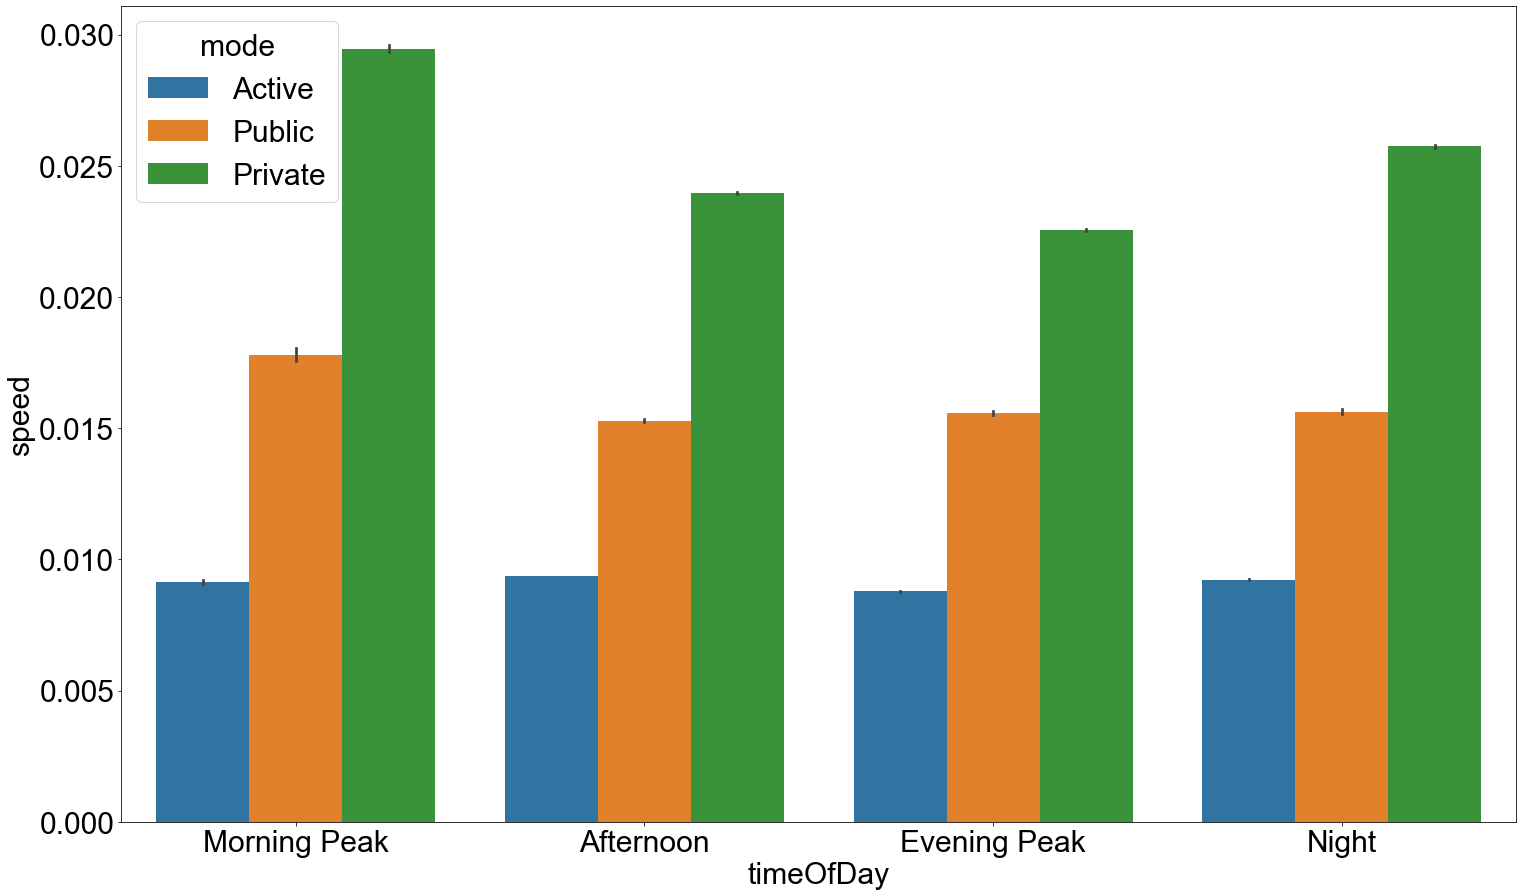

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']= 30
plt.figure(figsize=(25,15))
import seaborn as sns
sns.barplot(x="timeOfDay", y="speed", hue = "mode",data=data, order = ["Morning Peak","Afternoon","Evening Peak","Night"])
#plt.savefig('../Results/Speed by time of day for each travel mode.png', format='png', dpi=1200)

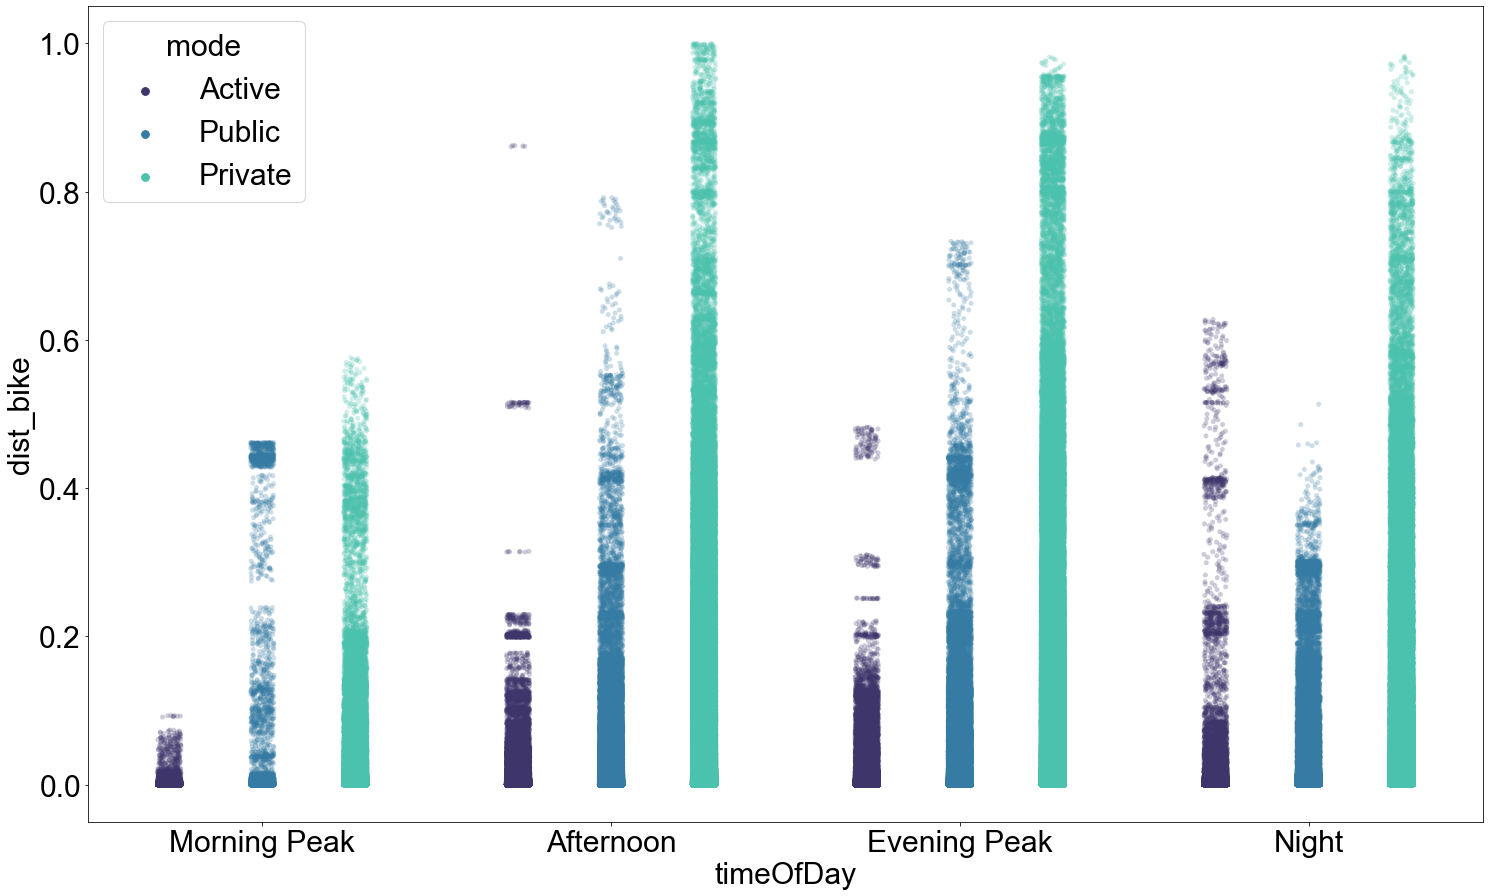

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']= 30
plt.figure(figsize=(25,15))
sns.stripplot(y = "dist_bike", x = "timeOfDay", hue = "mode", data = data, order = ["Morning Peak", "Afternoon","Evening Peak", "Night"],dodge=True, alpha=.25, zorder=1, palette = "mako")
plt.savefig('../Results/Proximity to bikelanes by time of day for each travel mode.png', format='png', dpi=1200)

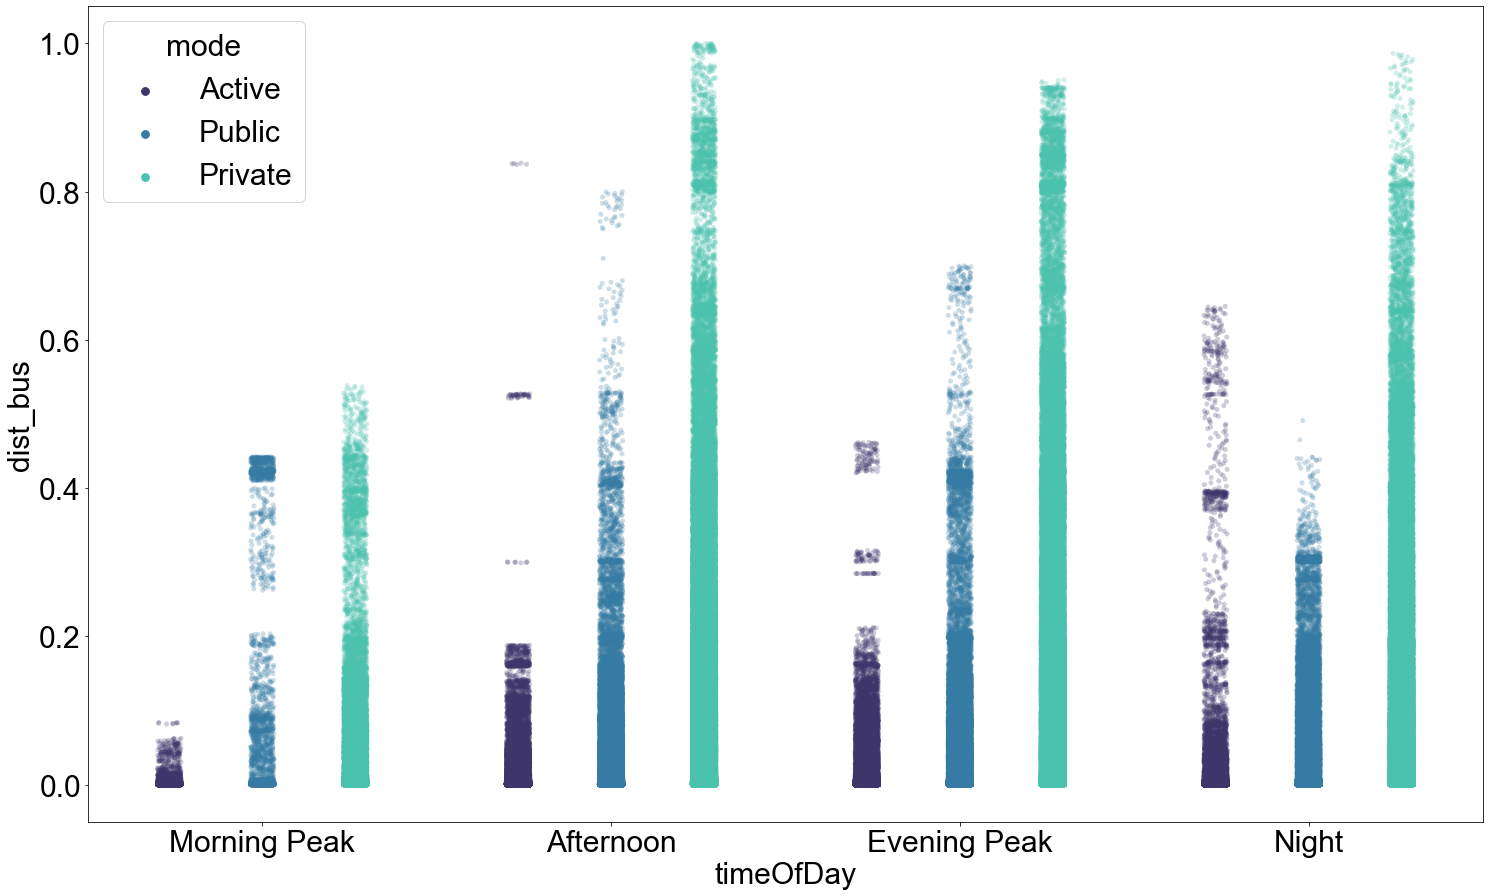

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']= 30
plt.figure(figsize=(25,15))
sns.stripplot(y = "dist_bus", x = "timeOfDay", palette = "mako",hue = "mode", data = data, order = ["Morning Peak", "Afternoon","Evening Peak", "Night"],dodge=True, alpha=.25, zorder=1)
plt.savefig('../Results/Proximity to bus stops by time of day for each travel mode.png', format='png', dpi=1200)

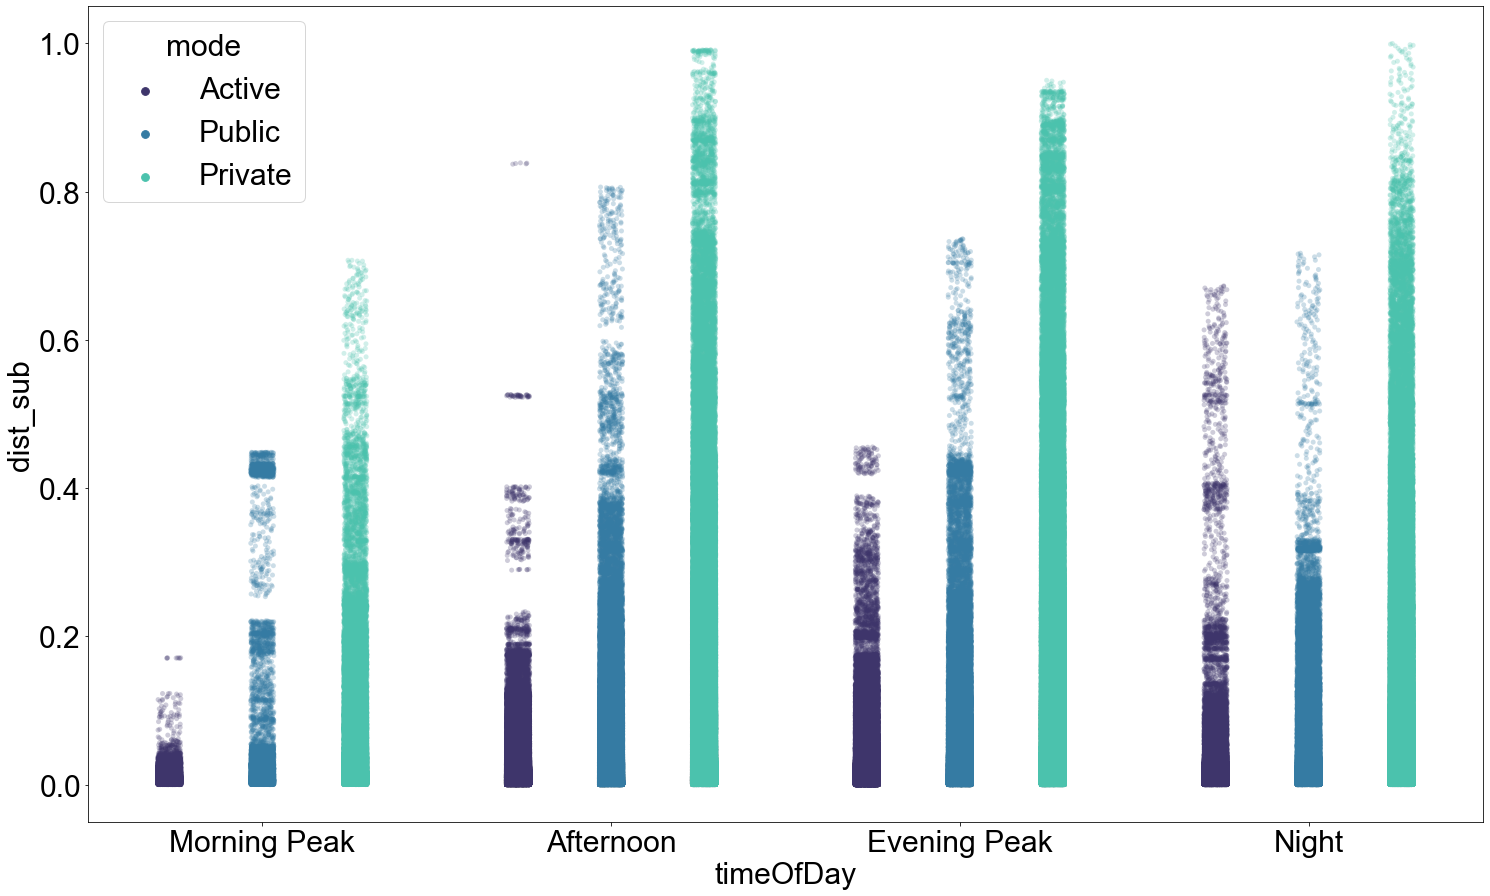

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']= 30
plt.figure(figsize=(25,15))
sns.stripplot(y = "dist_sub", x = "timeOfDay", palette = "mako", hue = "mode", data = data, order = ["Morning Peak", "Afternoon","Evening Peak", "Night"],dodge=True, alpha=.25, zorder=1)
plt.savefig('../Results/Proximity to subways by time of day for each travel mode.png', format='png', dpi=1200)

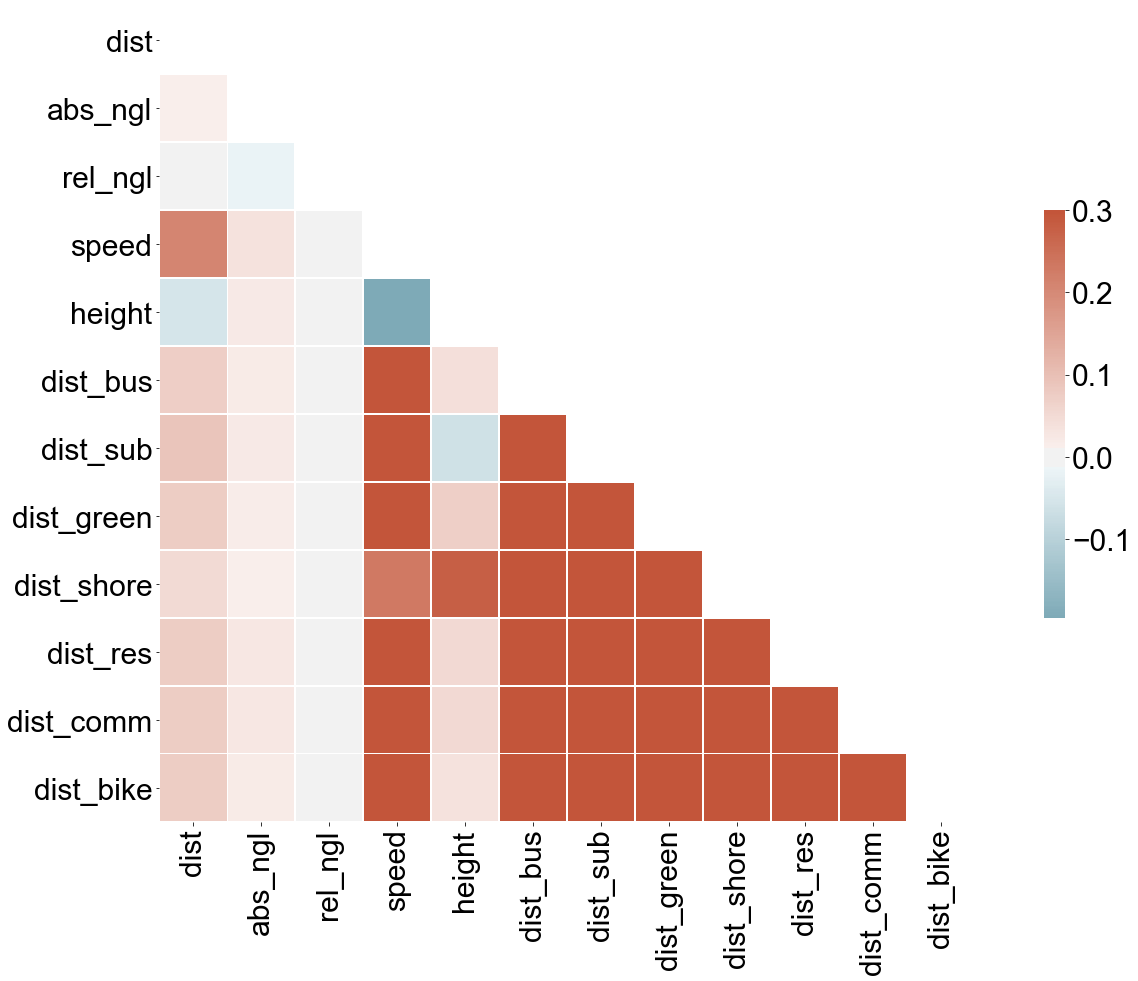

In [11]:
#Correlation matrix for independent variables
#Convert string columns to numbers
cleanup_chars = {"timeOfDay":     {"Morning Peak": 1, "Afternoon": 2, "Evening Peak": 3, "Night": 4},
                "season": {"Spring": 1, "Summer": 2, "Fall": 3, "Winter": 4},
                "city": {"Montreal": 1, "St. Johns": 2, "Vancouver": 3}}
data = data.replace(cleanup_chars).fillna(0)
# Compute the correlation matrix
corr = data.loc[:, ~data.columns.isin(['mode', 'Unnamed: 0','timeOfDay','season','city'])].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Set plot parameters
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']= 30
plt.figure(figsize=(25,15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig("../Results/Correlation matrix for numeric features.png", format = "png", dpi = 1200)

In [3]:
import pickle
# load the model from disk
#Random Forest
RF_gps_model = pickle.load(open("../Results/RF_gps_model.sav", 'rb'))
RF_gis_model = pickle.load(open("../Results/RF_gis_model.sav", 'rb'))
RF_all_model = pickle.load(open("../Results/RF_all_model.sav", 'rb'))

#Gradient Boost
XGB_gps_model = pickle.load(open("../Results/XGB_gps_model.sav", 'rb'))
XGB_gis_model = pickle.load(open("../Results/XGB_gis_model.sav", 'rb'))
XGB_all_model = pickle.load(open("../Results/XGB_all_model.sav", 'rb'))

#SVM
SVM_gps_model = pickle.load(open("../Results/SVM_gps_model.sav", 'rb'))
SVM_gis_model = pickle.load(open("../Results/SVM_gis_model.sav", 'rb'))
SVM_all_model = pickle.load(open("../Results/SVM_all_model.sav", 'rb'))

#Multilayer Perceptron
MLP_gps_model = pickle.load(open("../Results/MLP_gps_model.sav", 'rb'))
MLP_gis_model = pickle.load(open("../Results/MLP_gis_model.sav", 'rb'))
MLP_all_model = pickle.load(open("../Results/MLP_all_model.sav", 'rb'))

#CART
CART_gps_model = pickle.load(open("../Results/CART_gps_model.sav", 'rb'))
CART_gis_model = pickle.load(open("../Results/CART_gis_model.sav", 'rb'))
CART_all_model = pickle.load(open("../Results/CART_all_model.sav", 'rb'))

#AdaBoost
ADB_gps_model = pickle.load(open("../Results/ADB_gps_model.sav", 'rb'))
ADB_gis_model = pickle.load(open("../Results/ADB_gis_model.sav", 'rb'))
ADB_all_model = pickle.load(open("../Results/ADB_all_model.sav", 'rb'))

In [4]:
s = RF_gps_model
m = 10*['RF']
f = 10 * ['GPS']
df1 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = RF_gis_model
m = 10*['RF']
f = 10 * ['GIS']
df2 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = RF_all_model
m = 10*['RF']
f = 10 * ['Both']
df3 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = XGB_gps_model
m = 10*['XGB']
f = 10 * ['GPS']
df4 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = XGB_gis_model
m = 10*['XGB']
f = 10 * ['GIS']
df5 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = XGB_all_model
m = 10*['XGB']
f = 10 * ['Both']
df6 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = SVM_gps_model
m = 10*['SVM']
f = 10 * ['GPS']
df7 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = SVM_gis_model
m = 10*['SVM']
f = 10 * ['GIS']
df8 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = SVM_all_model
m = 10*['SVM']
f = 10 * ['Both']
df9 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = MLP_gps_model
m = 10*['MLP']
f = 10 * ['GPS']
df10 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = MLP_gis_model
m = 10*['MLP']
f = 10 * ['GIS']
df11 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = MLP_all_model
m = 10*['MLP']
f = 10 * ['Both']
df12 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = CART_gps_model
m = 10*['CART']
f = 10 * ['GPS']
df13 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = CART_gis_model
m = 10*['CART']
f = 10 * ['GIS']
df14 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = CART_all_model
m = 10*['CART']
f = 10 * ['Both']
df15 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = ADB_gps_model
m = 10*['ADB']
f = 10 * ['GPS']
df16 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = ADB_gis_model
m = 10*['ADB']
f = 10 * ['GIS']
df17 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})

s = ADB_all_model
m = 10*['ADB']
f = 10 * ['Both']
df18 = pd.DataFrame({'Model':m,'Features':f,'Accuracy':s})



df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18])
df

,Model,Features,Accuracy
0,RF,GPS,0.709050
1,RF,GPS,0.722447
2,RF,GPS,0.760434
3,RF,GPS,0.765653
4,RF,GPS,0.716885
...,...,...,...
5,ADB,Both,0.726745
6,ADB,Both,0.784461
7,ADB,Both,0.742887
8,ADB,Both,0.718311


In [96]:
df.to_csv("../Results/Model_Accuracy_Statistics.csv")

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

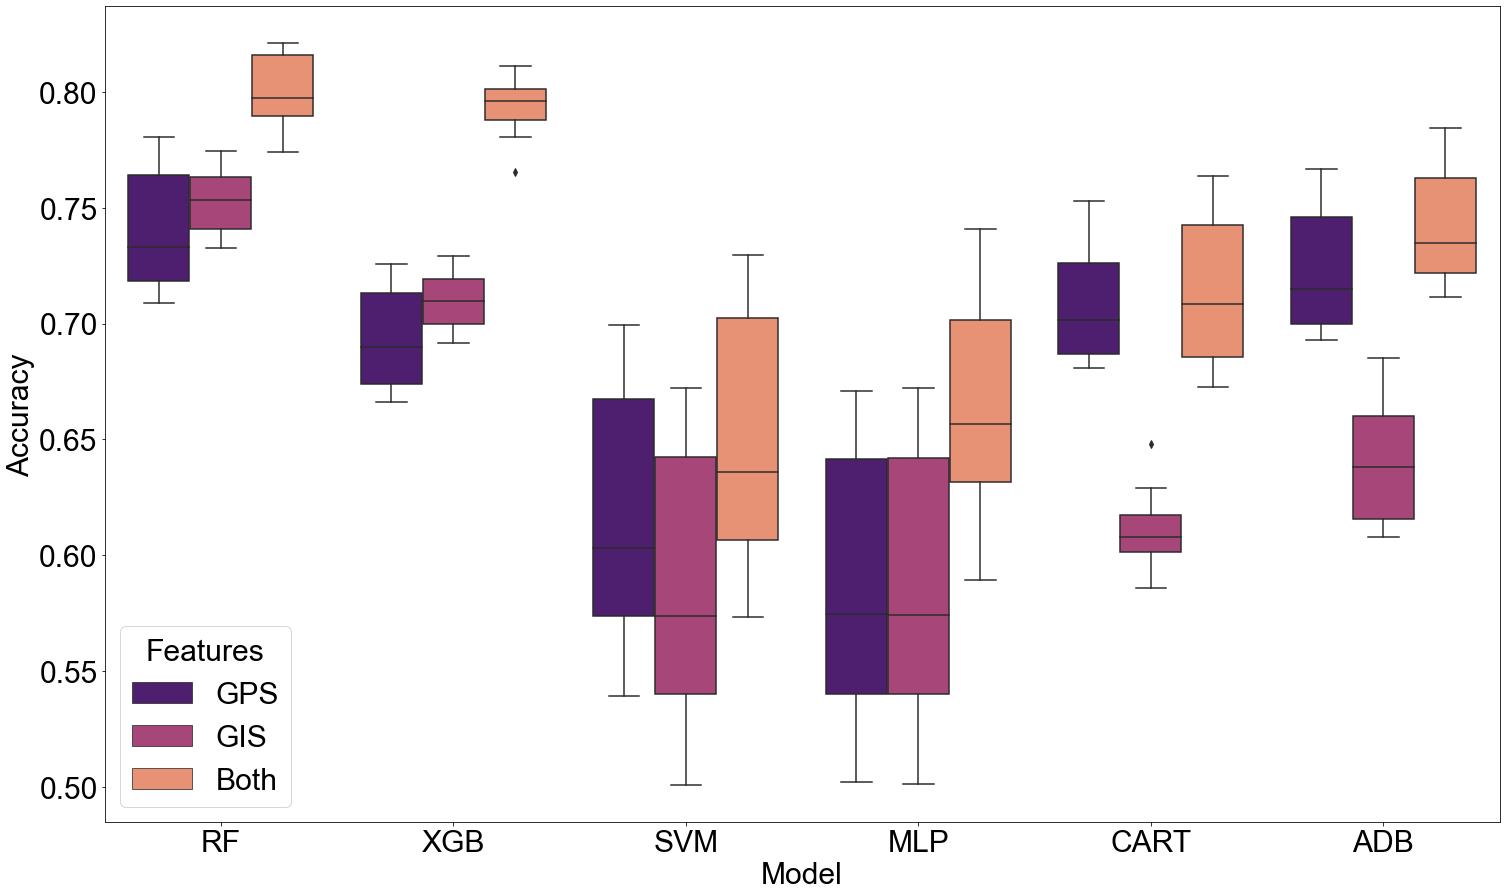

In [5]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']= 30
plt.figure(figsize=(25,15))
sns.boxplot(x = "Model", y = "Accuracy", hue = "Features", data = df, palette = "magma")
plt.savefig("../Results/Model Accuracy boxplots.png", format = "png", dpi = 1200)

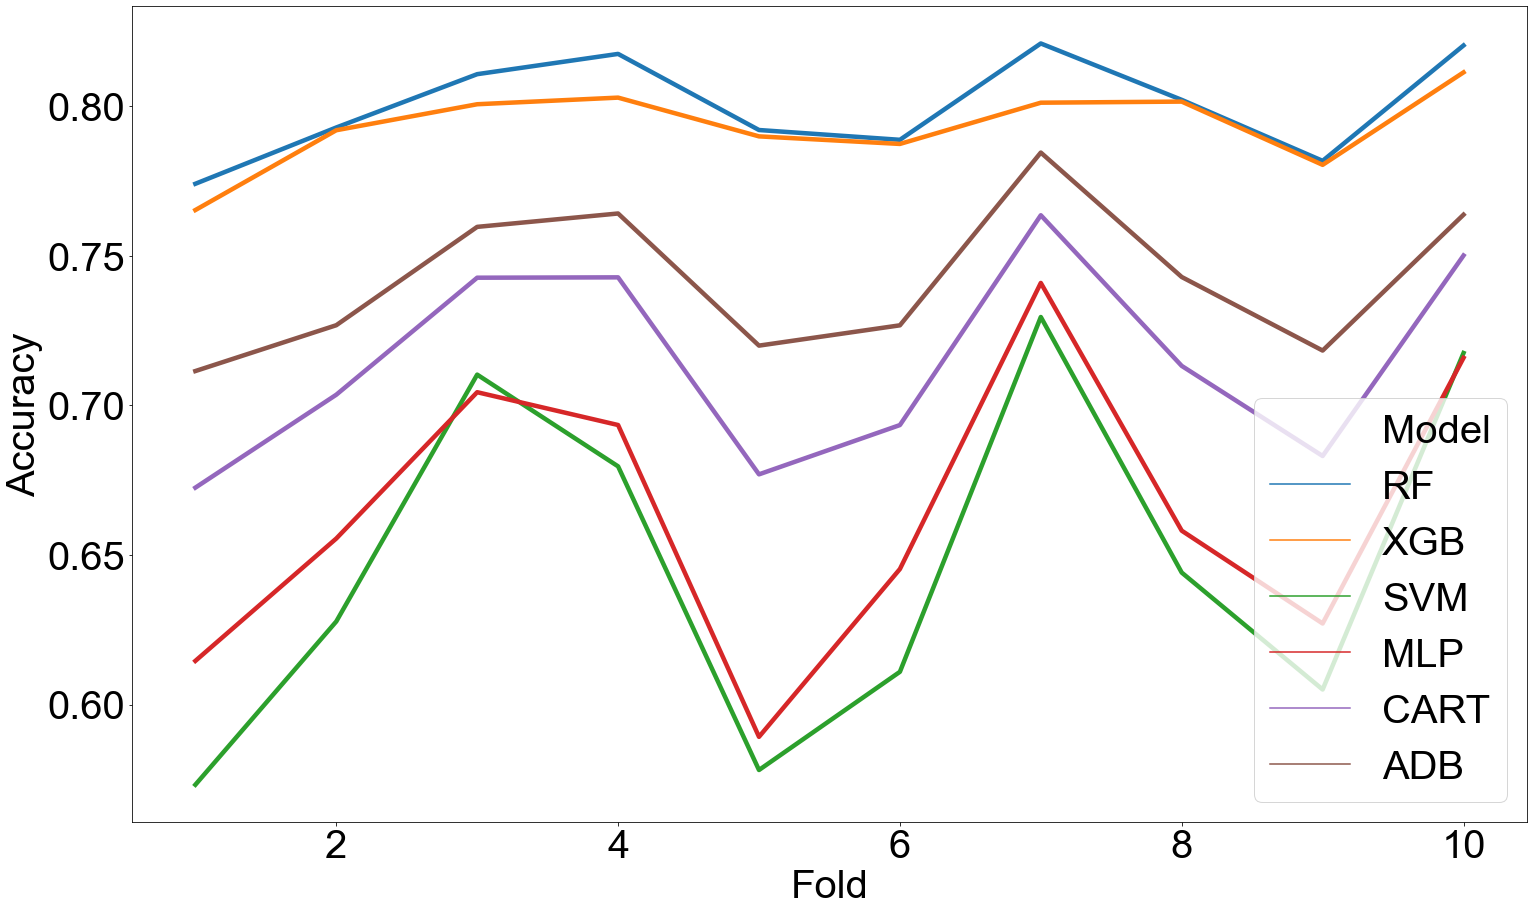

In [7]:
cv = np.array(range(1,11))
RF_acc = RF_all_model
XGB_acc = XGB_all_model
SVM_acc = SVM_all_model
CART_acc = CART_all_model
ADB_acc = ADB_all_model
MLP_acc = MLP_all_model

df1 = pd.DataFrame({'Fold':cv,'Accuracy':RF_acc,'Model':10*['RF']})
df2 = pd.DataFrame({'Fold':cv,'Accuracy':XGB_acc,'Model':10*['XGB']})
df3 = pd.DataFrame({'Fold':cv,'Accuracy':SVM_acc,'Model':10*['SVM']})
df4 = pd.DataFrame({'Fold':cv,'Accuracy':MLP_acc,'Model':10*['MLP']})
df5 = pd.DataFrame({'Fold':cv,'Accuracy':CART_acc,'Model':10*['CART']})
df6 = pd.DataFrame({'Fold':cv,'Accuracy':ADB_acc,'Model':10*['ADB']})
df = pd.concat([df1,df2,df3,df4,df5,df6])

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']= 40
plt.figure(figsize=(25,15))
sns.lineplot(data = df, x = "Fold", y = "Accuracy", hue = "Model", linewidth  = 4.5)
plt.savefig("../Results/Model Accuracy comparisons lineplot.png", format = "png", dpi = 1200)

In [9]:
y_pred = pd.read_csv("../Results/RF Predicted Labels all feature sets.csv")
y_pred_gps = y_pred.RF_GPS_Pred
y_pred_gis = y_pred.RF_GIS_Pred
y_pred_all = y_pred.RF_Both_Pred

y_true = pd.read_csv("../Results/True Labels all feature sets.csv")
y1_gps = y_true.GPS_True
y1_gis = y_true.GIS_True
y1_all = y_true.Both_True
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']= 20
plt.figure(figsize=(25,15))

#Generate confusion matrices
cm_gps = confusion_matrix(y1_gps, y_pred_gps, normalize='true')
cm_gis = confusion_matrix(y1_gis, y_pred_gis, normalize='true')
cm_all = confusion_matrix(y1_all, y_pred_all, normalize='true')

#Display confusion matrices
disp_gps = ConfusionMatrixDisplay(confusion_matrix=cm_gps, display_labels=['Active','Public','Private'])
disp_gis = ConfusionMatrixDisplay(confusion_matrix=cm_gis, display_labels=['Active','Public','Private'])
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['Active','Public','Private'])

<Figure size 1800x1080 with 0 Axes>

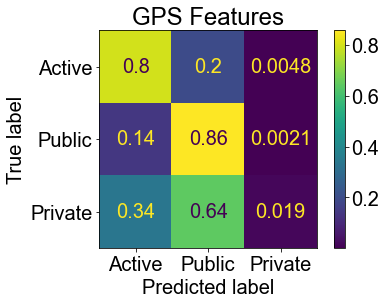

In [10]:
disp_gps.plot() 
plt.title("GPS Features")
plt.savefig("../Results/RF_GPS_only_ConfusionMatrix.png", format = "png", dpi = 1200)

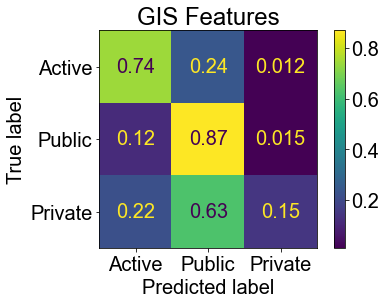

In [11]:
disp_gis.plot() 
plt.title("GIS Features")
plt.savefig("../Results/RF_GIS_only_ConfusionMatrix.png", format = "png", dpi = 1200)

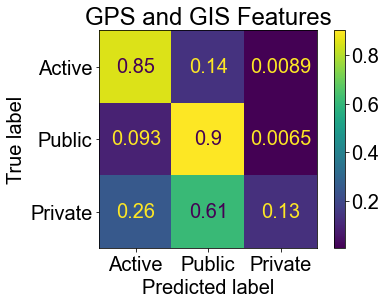

In [12]:
disp_all.plot()
plt.title("GPS and GIS Features")
plt.savefig("../Results/RF_AllFeatures_ConfusionMatrix.png", format = "png", dpi = 1200)

In [15]:
#Calculate F1-score

from sklearn.metrics import f1_score
print(f1_score(y1_gps, y_pred_gps, average='weighted'))
print(f1_score(y1_gis, y_pred_gis, average='weighted'))
print(f1_score(y1_all, y_pred_all, average='weighted'))

0.6972585821499218
0.7204521315920861
0.7653185280728383


In [19]:
#Plot classification metrics of RandomForest Model with different features
from sklearn.metrics import classification_report

modes = ['Active','Public','Private']
RF_gps_report = classification_report(y1_gps,y_pred_gps, target_names = modes, output_dict = True)
RF_gis_report = classification_report(y1_gis,y_pred_gis, target_names = modes, output_dict = True)
RF_all_report = classification_report(y1_all,y_pred_all, target_names = modes, output_dict = True)

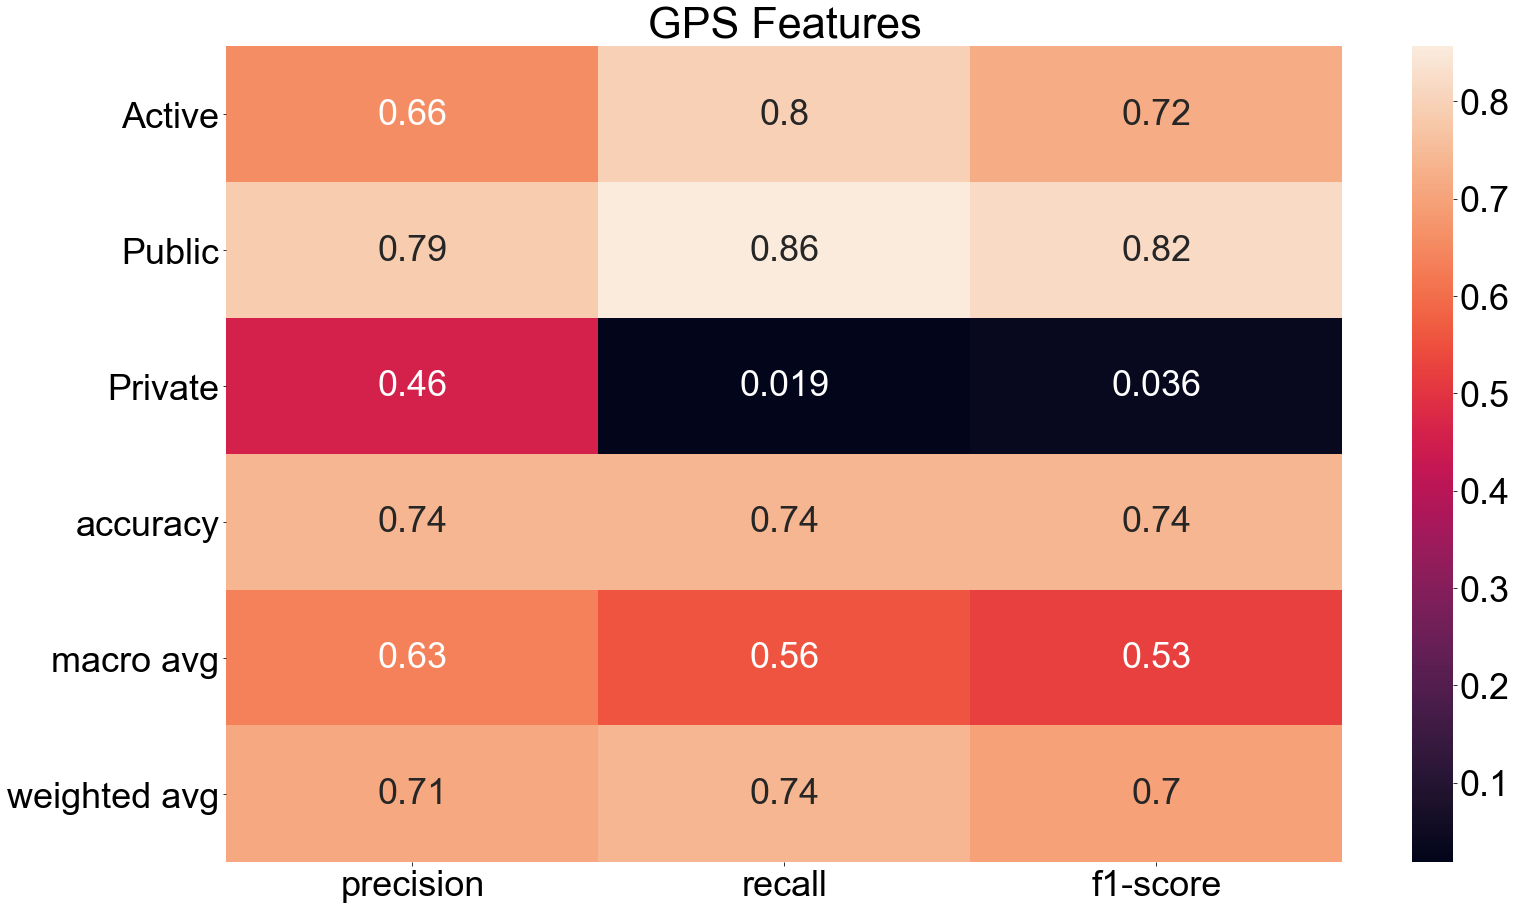

In [36]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']= 36
plt.figure(figsize=(25,15))
sns.heatmap(pd.DataFrame(RF_gps_report).iloc[:-1, :].T, annot=True)
plt.title("GPS Features")
plt.savefig("../Results/Prdiction Accuracy heatmap GPS features.png", format = "png", dpi = 1200)

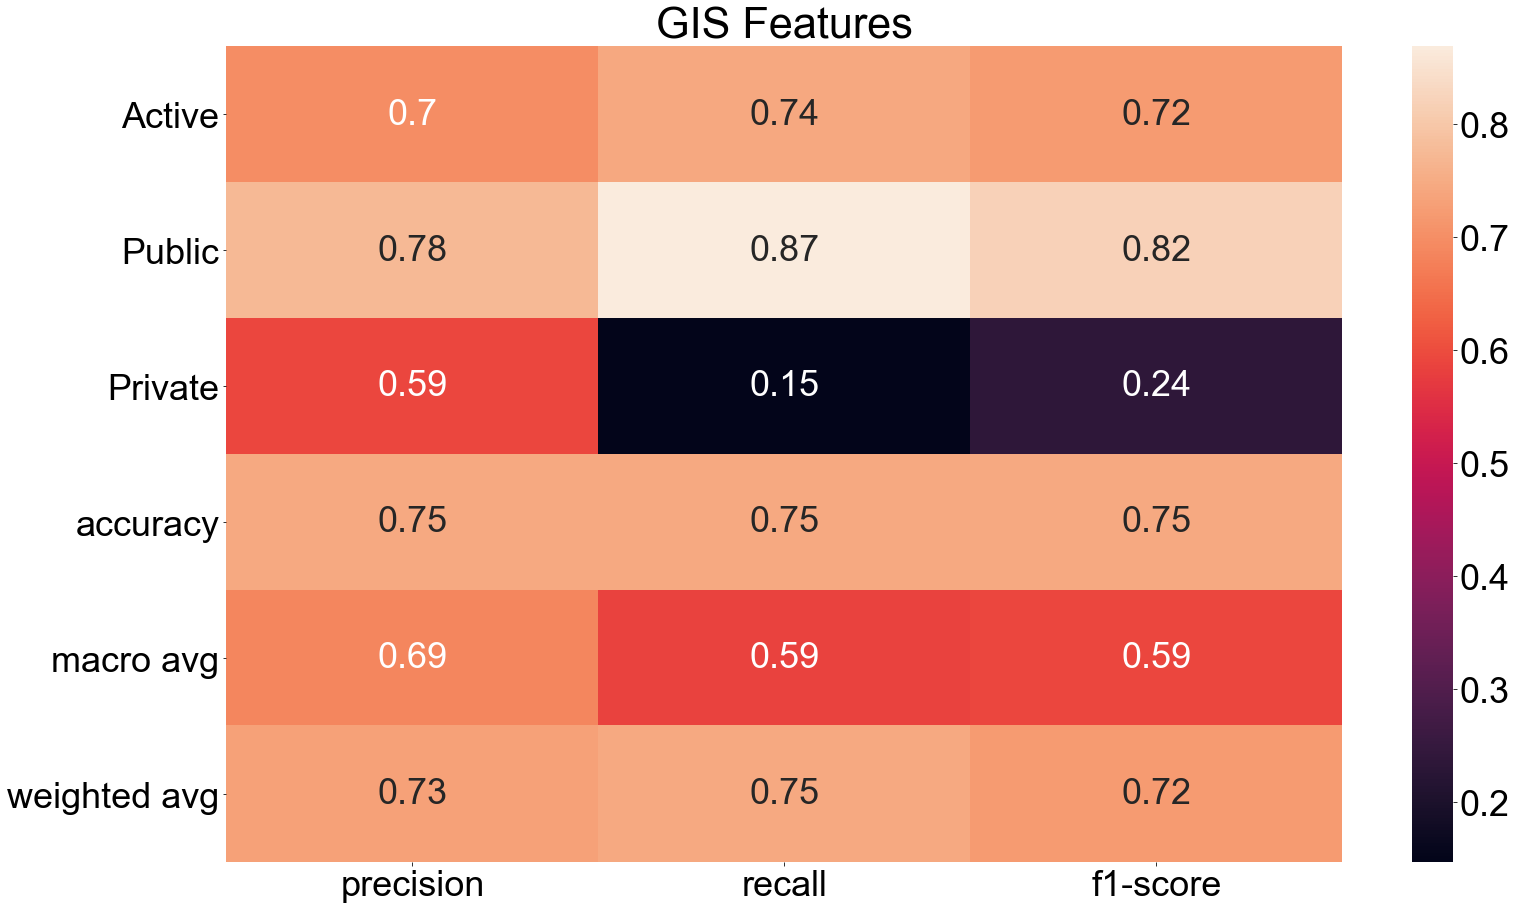

In [35]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']= 36
plt.figure(figsize=(25,15))
sns.heatmap(pd.DataFrame(RF_gis_report).iloc[:-1, :].T, annot=True)
plt.title("GIS Features")
plt.savefig("../Results/Prdiction Accuracy heatmap GIS features.png", format = "png", dpi = 1200)

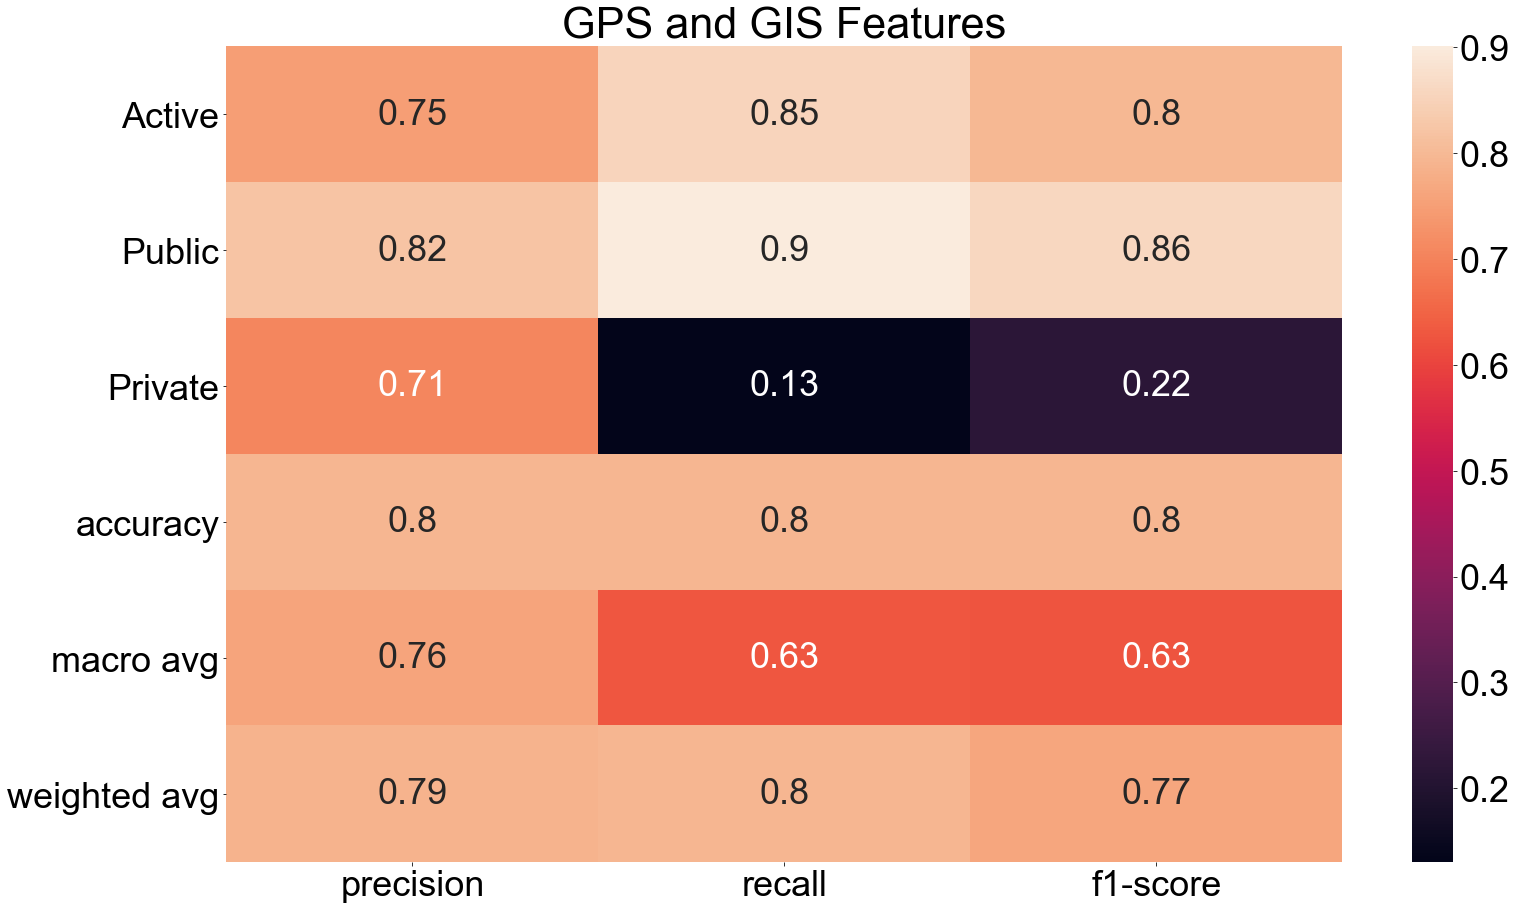

In [34]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']= 36
plt.figure(figsize=(25,15))
sns.heatmap(pd.DataFrame(RF_all_report).iloc[:-1, :].T, annot=True)
plt.title("GPS and GIS Features")
plt.savefig("../Results/Prdiction Accuracy heatmap GPS and GIS features.png", format = "png", dpi = 1200)